 **Bank customer satisfication prediction using CNN**

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#numpy is used to perform basic array operations
#seaborn is used to visualize the results
#pandas for loading and manipulating the data.
#pyplot from matplotlib is used to visualize the results.
#train_test_split is used to split the data into training and testing datasets.
#StandardScaler is used to scale the values in the data.
#VarianceThreshold is used for feature selection.
#Tensorflow is used to build the neural network.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.12.0


In [ ]:
data = pd.read_csv('train.csv')
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [ ]:
data.shape

(76020, 371)

In [ ]:
data.isnull().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

In [ ]:
data.dropna(axis=0,inplace=True)

In [ ]:
data.isnull().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

In [ ]:
data.shape

(76020, 371)

In [ ]:
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [ ]:
data["TARGET"]

0        0
1        0
2        0
3        0
4        0
        ..
76015    0
76016    0
76017    0
76018    0
76019    0
Name: TARGET, Length: 76020, dtype: int64

In [ ]:
#removing the id,target column for the training dataset
X = data.drop(labels=['ID', 'TARGET'], axis = 1)
X.shape

(76020, 369)

In [ ]:
y = data['TARGET']
y

0        0
1        0
2        0
3        0
4        0
        ..
76015    0
76016    0
76017    0
76018    0
76019    0
Name: TARGET, Length: 76020, dtype: int64

In [ ]:
#Now we are dividing the dataset into 80 and 20 percent size
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, stratify = y)

In [ ]:
X_train.shape, X_test.shape

((60816, 369), (15204, 369))

# Remove Constant, Quasi Constant and Duplicate Features
*Constant Features are the features that show single values in all the observations in the dataset. These features provide no information that allows ML models to predict the target.

*Quasi constant features, as the name suggests, are the features that are almost constant. In other words, these features have the same values for a very large subset of the outputs. They have less variance. Such features are not very useful for making predictions.

*Duplicate Features as the name suggests are duplicated in the dataset.

In [ ]:
filter = VarianceThreshold(0.01)
X_train = filter.fit_transform(X_train)
X_test = filter.transform(X_test)

X_train.shape, X_test.shape

((60816, 273), (15204, 273))

In [ ]:
X_train_T = X_train.T
X_test_T = X_test.T

X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

X_train_T.shape

(273, 60816)

In [ ]:
X_train_T.duplicated().sum()

17

In [ ]:
duplicated_features = X_train_T.duplicated()
duplicated_features[70:90]

70    False
71    False
72     True
73    False
74     True
75    False
76    False
77    False
78    False
79    False
80    False
81    False
82    False
83    False
84    False
85    False
86    False
87    False
88    False
89    False
dtype: bool

In [ ]:
features_to_keep = [not index for index in duplicated_features]
features_to_keep[70:90]

[True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [ ]:
X_train = X_train_T[features_to_keep].T
X_train.shape

(60816, 256)

In [ ]:
X_test = X_test_T[features_to_keep].T
X_test.shape

(15204, 256)

In [ ]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,263,264,265,266,267,268,269,270,271,272
0,2.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
1,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85472.340000
2,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,317769.240000
3,2.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76209.960000
4,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,302754.000000


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[ 3.80478472e-02, -5.56029626e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03],
       [ 3.80478472e-02, -7.87181903e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02, -1.83006062e-01],
       [ 3.80478472e-02, -7.87181903e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  1.17499225e+00],
       ...,
       [ 3.80478472e-02,  5.99731758e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02, -2.41865113e-01],
       [ 3.80478472e-02, -1.70775831e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03],
       [ 3.80478472e-02,  2.91528722e-01,  7.65192053e+00, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03]])

In [ ]:
X_train.shape, X_test.shape

((60816, 256), (15204, 256))

In [ ]:
X_train = X_train.reshape(60816, 256,1)
X_test = X_test.reshape(15204, 256, 1)
X_train.shape, X_test.shape

((60816, 256, 1), (15204, 256, 1))

In [ ]:
!pip install pandas==2.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 89.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 2.0.0 which is incompatible.


In [ ]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

conv1D() is a 1D Convolution Layer, this layer is very effective for deriving features from a fixed-length segment of the overall dataset,where it is not so important where the feature is located in the segment.

In [ ]:
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape = (256,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.3))

model.add(Conv1D(64, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Conv1D(128, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 254, 32)           128       
                                                                 
 batch_normalization (BatchN  (None, 254, 32)          128       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 127, 32)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 125, 64)           6208      
                                                                 
 batch_normalization_1 (Batc  (None, 125, 64)          2

In [ ]:
model.compile(optimizer=Adam(lr=0.00005), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)


Epoch 1/10
1901/1901 [==============================] - 38s 12ms/step - loss: 0.1894 - accuracy: 0.9593 - val_loss: 0.1565 - val_accuracy: 0.9604
Epoch 2/10
1901/1901 [==============================] - 15s 8ms/step - loss: 0.1600 - accuracy: 0.9603 - val_loss: 0.1519 - val_accuracy: 0.9604
Epoch 3/10
1901/1901 [==============================] - 15s 8ms/step - loss: 0.1556 - accuracy: 0.9604 - val_loss: 0.1554 - val_accuracy: 0.9599
Epoch 4/10
1901/1901 [==============================] - 15s 8ms/step - loss: 0.1535 - accuracy: 0.9603 - val_loss: 0.1495 - val_accuracy: 0.9604
Epoch 5/10
1901/1901 [==============================] - 15s 8ms/step - loss: 0.1509 - accuracy: 0.9604 - val_loss: 0.1504 - val_accuracy: 0.9603
Epoch 6/10
1901/1901 [==============================] - 16s 9ms/step - loss: 0.1505 - accuracy: 0.9604 - val_loss: 0.1443 - val_accuracy: 0.9604
Epoch 7/10
1901/1901 [==============================] - 16s 8ms/step - loss: 0.1489 - accuracy: 0.9603 - val_loss: 0.1545 - val_a

In [ ]:
history.history

{'loss': [0.18937532603740692,
  0.16001655161380768,
  0.15557609498500824,
  0.1534872204065323,
  0.15092627704143524,
  0.15048950910568237,
  0.1488538533449173,
  0.14802516996860504,
  0.14737939834594727,
  0.1455817073583603],
 'accuracy': [0.9593034982681274,
  0.9602900743484497,
  0.960372269153595,
  0.960322916507721,
  0.960355818271637,
  0.960372269153595,
  0.960322916507721,
  0.960421621799469,
  0.960388720035553,
  0.960421621799469],
 'val_loss': [0.15654891729354858,
  0.15187402069568634,
  0.15538521111011505,
  0.14947982132434845,
  0.15037859976291656,
  0.14431066811084747,
  0.15453994274139404,
  0.14528433978557587,
  0.14688844978809357,
  0.1447000354528427],
 'val_accuracy': [0.960405170917511,
  0.960405170917511,
  0.9599447250366211,
  0.960405170917511,
  0.9602736234664917,
  0.960405170917511,
  0.960405170917511,
  0.960339367389679,
  0.960405170917511,
  0.960405170917511]}

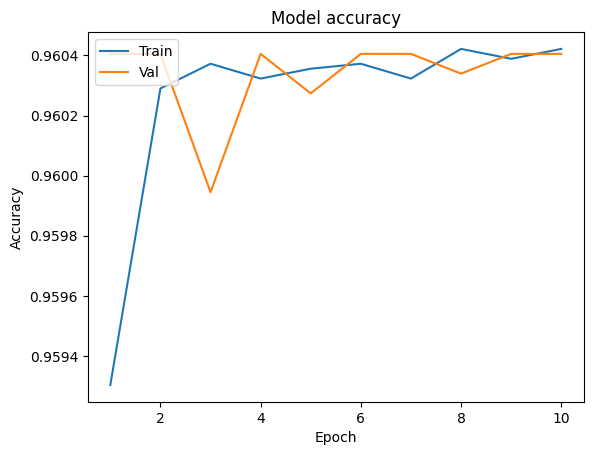

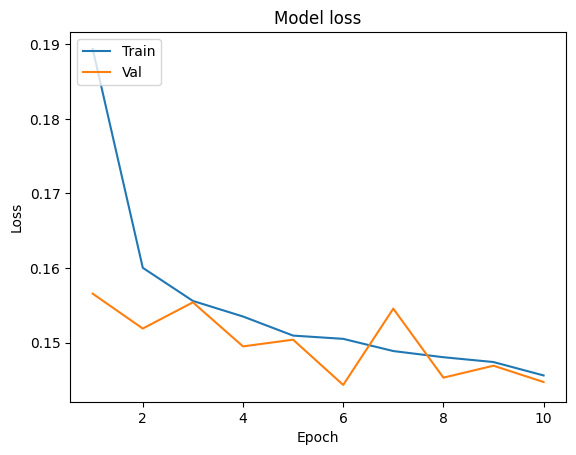

In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

plot_learningCurve(history, 10)